In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [4]:
# Load the dataset
data = pd.read_csv('Solar_radiation_classification.csv')

# Inspect the data
#print(data.head())



In [5]:
# Define feature columns and the target column
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Assuming 'Class' column has 3 unique classes



In [6]:
data['Class'].value_counts()

Monitoring    576
Running       430
Inspecting    256
Name: Class, dtype: int64

In [7]:
X.shape,y.shape

((1262, 22), (1262,))

In [8]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but may improve performance for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [26]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_scaled)



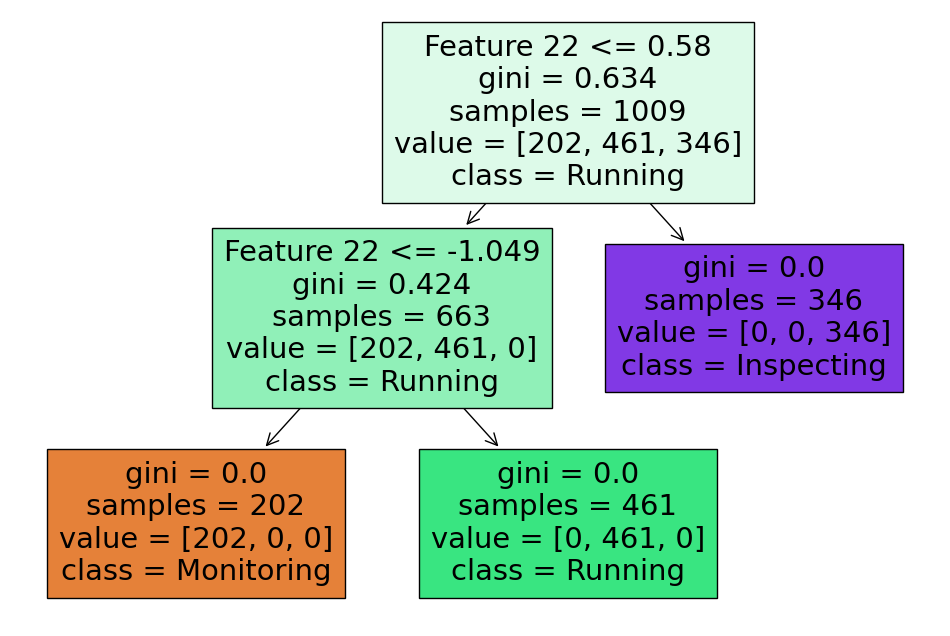

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree
feature_names = [f'Feature {i+1}' for i in range(22)]  # Modify with actual feature names if available
class_names = ['Monitoring', 'Running', 'Inspecting']  # Modify with actual class names

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt_classifier, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

In [21]:
# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))




Classification Report:
              precision    recall  f1-score   support

  Monitoring       0.00      0.00      0.00        54
     Running       0.68      1.00      0.81       115
  Inspecting       1.00      1.00      1.00        84

    accuracy                           0.79       253
   macro avg       0.56      0.67      0.60       253
weighted avg       0.64      0.79      0.70       253



C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [22]:

# Evaluate the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,precision_recall_curve
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
recall=recall_score(y_test, y_pred,average='macro')  
# macro: Unweighted average of the metrics for each class.All classes are treated equally.
print(f'Recall: {recall:.4f}')
precision=precision_score(y_test, y_pred,average='macro')
print(f'Precision: {precision:.4f}')
f1=f1_score(y_test, y_pred,average='macro')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.7866
Recall: 0.6667
Precision: 0.5602
F1-Score: 0.6033


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
recall=recall_score(y_test, y_pred,average='weighted')
print(f'Recall: {recall:.4f}')
#weighted: Takes class imbalance into account by weighting each class's contribution by 
#its support (number of true instances).
precision=precision_score(y_test, y_pred,average='weighted')
print(f'Precision: {precision:.4f}')
f1=f1_score(y_test, y_pred,average='weighted')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.7866
Recall: 0.7866
Precision: 0.6413
F1-Score: 0.7001


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 54   0   0]
 [  0 115   0]
 [  0   0  84]]


In [15]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Inspecting       1.00      1.00      1.00        54
  Monitoring       1.00      1.00      1.00       115
     Running       1.00      1.00      1.00        84

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253

